In [111]:
# Import data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from pathlib import Path
import glob

In [112]:
attr_types = ["ano", "ori"]
ndre_kinds = ["smooth", "interp"]
variables = ["ndre","temp","prec"]

In [113]:
# Function to read data
def read_data(in_path, data_type, sep):
    data = pd.read_csv(in_path,
                      sep=sep,
                      header=None,
                      dtype=data_type,
                      skipinitialspace=True,
                      nrows=100000)
    return data

In [114]:
# Read pos/neg location attribution timeseries
def read_attr(num, n_p, attr_typ, ndre_kind):
    dfs = []
    base = '/gpfs/alpine/cli137/proj-shared/6ru'
    p = base + '/' + f'amazonas_biweekly_0_timeseries_split_00_{ndre_kind}'
    filenames = glob.glob( p + "/{}_loc_{}_lag_{:02d}_rank_*.csv".format(n_p, attr_typ, num))
    filenames.sort()
    
    for filepath in filenames:
        this_df = pd.read_csv(filepath, sep=',', header=None, dtype=np.int32, skipinitialspace=True)
        dfs.append(this_df)
    dfs = pd.concat(dfs)
    return dfs

In [115]:


# File paths dict
filesnames = {}
filesnames ['ori'] = {}
filesnames ['ano'] = {}
filesnames ['ori'] ['smooth']= {}
filesnames ['ori'] ['interp']= {}
filesnames ['ano'] ['smooth']= {}
filesnames ['ano'] ['interp']= {}


# Data paths 
Data = {}
Data ['ori'] = {}
Data ['ano'] = {}
Data ['ori'] ['smooth']= {}
Data ['ori'] ['interp']= {}
Data ['ano'] ['smooth']= {}
Data ['ano'] ['interp']= {}

In [116]:
base = '/gpfs/alpine/cli137/proj-shared/6ru/Bharat_Test_Data'
filesnames ['ori']['smooth']['ndre'] = base + '/amazonas_biweekly_0_timeseries.split.00.smooth'
filesnames ['ori']['smooth']['temp'] = base + '/amazonas_biweekly_0_timeseries.split.00.temp'
filesnames ['ori']['smooth']['prec'] = base + '/amazonas_biweekly_0_timeseries.split.00.precip'
filesnames ['ori']['interp']['ndre'] = base + '/amazonas_biweekly_0_timeseries.split.00.interp'

filesnames ['ano']['smooth']['ndre'] = base + '/amazonas_biweekly_0_timeseries.split.00_ano.smooth'
filesnames ['ano']['smooth']['temp'] = base + '/amazonas_biweekly_0_timeseries.split.00_ano.temp'
filesnames ['ano']['smooth']['prec'] = base + '/amazonas_biweekly_0_timeseries.split.00_ano.precip'
filesnames ['ano']['interp']['ndre'] = base + '/amazonas_biweekly_0_timeseries.split.00_ano.interp'



In [117]:
# Reading all data of ori, ano, vars and ndre_kind
ts_type = "ano"
for attr_type in attr_types:
    if attr_type == "ano": sep_type =','
    if attr_type == "ori": sep_type =' '
        
    ndre_kind = "smooth"
    for var in variables :
        Data [attr_type][ndre_kind][var] = read_data(filesnames[attr_type][ndre_kind][var],np.float16, sep = sep_type)
    ndre_kind = "interp"
    Data [attr_type][ndre_kind]["ndre"] = read_data(filesnames[attr_type]["interp"]["ndre"],np.float16, sep = sep_type)


In [118]:
# Function to calculate anomalies
# ===============================
def Calc_Anomalies (data_ar):
    """
    Input : np array of shape (n,100)
    where 'n' is number of pixels
    100: is biweekly values
    
    Output: Anomalies
    i.e. TS of first 3 years - benchmark TS
    benchmark TS = av of (p,p+25,p+50, p+1,p+26,p+51, ..... , p+24,p+49,p+74) x3 
    """
    # Checking the shape of the input matrix
    np.testing.assert_array_equal(data_ar.shape, (data_ar.shape[0], 100),
                                  err_msg= 'The shape of the Input matrix should be (n , 100)')

    # Only keeping first 75 values i.e. 3 years of data
    data_ar = data_ar[:,:75]
    # Masking -ve values 
    data_ar = np.ma.masked_less_equal(data_ar, 0)
    # data_NDRE = tmp.data * ~tmp.mask # if masking with zeros

    # Aim: to calculate the benchmark ts per pixel ...
    # ... average annual ts of 3 years
    data_ar_re = np.reshape(data_ar,(data_ar.shape[0],25,3))
    data_ar_av_1yr = np.ma.average(data_ar_re,axis=2)
    data_ar_bench = np.concatenate((data_ar_av_1yr,data_ar_av_1yr,data_ar_av_1yr), axis=1)
    # anomalies = NDRE -  3year average yearly TS 
    data_ar_anomalies = data_ar - data_ar_bench
    return data_ar_anomalies


In [119]:
# Random selection of pixels
list_random_pixels = random.sample(list(np.arange(100000)), 25)

# Or add the pixels manually
# list_random_pixels = [134, 4563, 5553]

In [120]:
# Calculation of anomalies [for a few pixels]
# ======================== 
df_pixels = {}
df_pixels ['ori'] = {}
df_pixels ['ano'] = {}
df_pixels ['ori'] ['smooth']= {}
df_pixels ['ori'] ['interp']= {}
df_pixels ['ano'] ['smooth']= {}
df_pixels ['ano'] ['interp']= {}

df_pixels ['ori']['smooth']['ndre'] = Data['ori']['smooth']['ndre'].iloc[list_random_pixels,:] .iloc[:,:75]
df_pixels ['ori']['smooth']['temp'] = Data['ori']['smooth']['temp'].iloc[list_random_pixels,:] .iloc[:,:75]
df_pixels ['ori']['smooth']['prec'] = Data['ori']['smooth']['prec'].iloc[list_random_pixels,:] .iloc[:,:75]
df_pixels ['ori']['interp']['ndre'] = Data['ori']['interp']['ndre'].iloc[list_random_pixels,:] .iloc[:,:75]
#df_pixels ['ano']['smooth']['ndre'] = Calc_Anomalies (Data['ori']['smooth']['ndre'].iloc[list_random_pixels,:])
#df_pixels ['ano']['smooth']['temp'] = Calc_Anomalies (Data['ori']['smooth']['temp'].iloc[list_random_pixels,:])
#df_pixels ['ano']['smooth']['prec'] = Calc_Anomalies (Data['ori']['smooth']['prec'].iloc[list_random_pixels,:])
#df_pixels ['ano']['interp']['ndre'] = Calc_Anomalies (Data['ori']['interp']['ndre'].iloc[list_random_pixels,:])


#because the code is designed for numpy array
arr_pixels = {}
arr_pixels ['ori'] = {}
arr_pixels ['ano'] = {}
arr_pixels ['ori'] ['smooth']= {}
arr_pixels ['ori'] ['interp']= {}
arr_pixels ['ano'] ['smooth']= {}
arr_pixels ['ano'] ['interp']= {}

arr_pixels ['ori']['smooth']['ndre'] = np.array(Data['ori']['smooth']['ndre'].iloc[list_random_pixels,:] .iloc[:,:75])
arr_pixels ['ori']['smooth']['temp'] = np.array(Data['ori']['smooth']['temp'].iloc[list_random_pixels,:] .iloc[:,:75])
arr_pixels ['ori']['smooth']['prec'] = np.array(Data['ori']['smooth']['prec'].iloc[list_random_pixels,:] .iloc[:,:75])
arr_pixels ['ori']['interp']['ndre'] = np.array(Data['ori']['interp']['ndre'].iloc[list_random_pixels,:] .iloc[:,:75])
arr_pixels ['ano']['smooth']['ndre'] = Calc_Anomalies (np.array(Data['ori']['smooth']['ndre'].iloc[list_random_pixels,:]))
arr_pixels ['ano']['smooth']['temp'] = Calc_Anomalies (np.array(Data['ori']['smooth']['temp'].iloc[list_random_pixels,:]))
arr_pixels ['ano']['smooth']['prec'] = Calc_Anomalies (np.array(Data['ori']['smooth']['prec'].iloc[list_random_pixels,:]))
arr_pixels ['ano']['interp']['ndre'] = Calc_Anomalies (np.array(Data['ori']['interp']['ndre'].iloc[list_random_pixels,:]))



In [121]:
# Attribution
# ===========

Codes = {
    999 : "too few values",
    10 : "neg NDRE ext driven by dry",
    20 : "neg NDRE ext driven by hot",
    30 : "neg NDRE ext driven by wet",
    40 : "neg NDRE ext driven by cold",
    60 : "pos NDRE ext driven by dry",
    70 : "pos NDRE ext driven by hot",
    80 : "pos NDRE ext driven by wet",
    90 : "pos NDRE ext driven by cold",
    100: "neg NDRE ext driven by dry and dry",
    110: "pos NDRE ext driven by wet and cold",

}


In [122]:
def Attribution_Drivers_Codes (ts_ndre_ano, ts_pr_ano, ts_tas_ano,lag=0):
    """
    Checks the climatic conditions during negative and postive NDRE extremes at a pixel.
    Assigns codes of attributions.
     
     999     : 'too few values',
     10 + lag: 'neg NDRE ext driven by dry',
     20 + lag: 'neg NDRE ext driven by hot',
     30 + lag: 'neg NDRE ext driven by wet',
     40 + lag: 'neg NDRE ext driven by cold',
     60 + lag: 'pos NDRE ext driven by dry',
     70 + lag: 'pos NDRE ext driven by hot',
     80 + lag: 'pos NDRE ext driven by wet',
     90 + lag: 'pos NDRE ext driven by cold',
     100+ lag: 'neg NDRE ext driven by dry and dry',
     110+ lag: 'pos NDRE ext driven by wet and cold'
     
     
    Parameters
    ----------
    ts_ndre_ano : ts of a pixel of NDRE
    ts_pr_ano : ts of a pixel of NDRE
    ts_tas_ano : ts of a pixel of NDRE
    lag: lag timestep, default =0
    
    Returns
    -------
    The attributions codes array of a pixel
    """
    # To include the effect of lag
    if lag > 0 :
        ts_ndre_ano = ts_ndre_ano[lag:]
        ts_pr_ano   = ts_pr_ano  [:-lag]
        ts_tas_ano  = ts_tas_ano [:-lag]

    # initializing the codes array per pixel with zeros and will fill as conditions are met
    ts_codes_px = np.zeros((len(Codes)))

    ts_ndre_ano_non_mask_vals = ts_ndre_ano[~ts_ndre_ano.mask]
    if ts_ndre_ano_non_mask_vals.size < 50:
        code_px = 999
        ts_codes_px[0] = code_px
        # Printing zeros for location of extremes
        loc_25q = np.zeros((75-int(lag)))
        loc_75q = np.zeros((75-int(lag)))
    else:
        # Mean value of NDRE anomalies of 25th quarlite
        loc_25q = ts_ndre_ano<np.percentile(ts_ndre_ano_non_mask_vals,25)
        px_ndre_25q = ts_ndre_ano[loc_25q].mean()
        # Mean value of NDRE anomalies of 75th quarlite
        loc_75q = ts_ndre_ano>np.percentile(ts_ndre_ano_non_mask_vals,75)
        px_ndre_75q = ts_ndre_ano[loc_75q].mean()

        # Mean precipiration and temperature during < 25q NDRE
        pr_du_neg  = ts_pr_ano[loc_25q].mean()
        tas_du_neg = ts_tas_ano[loc_25q].mean()
        # Mean precipiration and temperature during > 75q NDRE
        pr_du_pos  = ts_pr_ano[loc_75q].mean()
        tas_du_pos = ts_tas_ano[loc_75q].mean()

        # 25q of precipitation
        pr_25q = np.percentile(ts_pr_ano,25)
        # 75q of precipitation
        pr_75q = np.percentile(ts_pr_ano,75)

        # 25q of tas
        tas_25q = np.percentile(ts_tas_ano,25)
        # 75q of tas
        tas_75q = np.percentile(ts_tas_ano,75)

        if pr_du_neg < pr_25q :
            # neg NDRE ext driven by dry : 10+ lag
            code_px = 10+ lag
            ts_codes_px[1] = code_px
        if tas_du_neg > tas_75q :
            # neg NDRE ext driven by hot : 20+ lag
            code_px = 20+ lag
            ts_codes_px[2] = code_px
        if pr_du_neg > pr_75q :
            # neg NDRE ext driven by wet : 30+ lag
            code_px = 30+ lag
            ts_codes_px[3] = code_px
        if tas_du_neg < tas_25q :
            # neg NDRE ext driven by cold : 40+ lag
            code_px = 40+ lag
            ts_codes_px[4] = code_px

        if pr_du_pos < pr_25q :
            # pos NDRE ext driven by dry : 60+ lag
            code_px = 60+ lag
            ts_codes_px[5] = code_px
        if tas_du_pos > tas_75q :
            # pos NDRE ext driven by hot : 70+ lag
            code_px = 70+ lag
            ts_codes_px[6] = code_px
        if pr_du_pos > pr_75q :
            # pos NDRE ext driven by wet : 80+ lag
            code_px = 80+ lag
            ts_codes_px[7] = code_px
        if tas_du_pos < tas_25q :
            # pos NDRE ext driven by cold : 90+ lag
            code_px = 90+ lag
            ts_codes_px[8] = code_px

        if (10 in ts_codes_px) and (20 in ts_codes_px):
            # neg NDRE ext driven by dry and dry : 100 + lag
            code_px = 100+ lag
            ts_codes_px[9] = code_px

        if (80 in ts_codes_px) and (90 in ts_codes_px):
            # pos NDRE ext driven by wet and cold : 110 + lag
            code_px = 110 + lag
            ts_codes_px[10] = code_px

    return ts_codes_px, loc_25q, loc_75q



In [123]:
def Attribution_Drivers_Codes_1025 (ts_ndre_ano, ts_pr_ano, ts_tas_ano,lag=0):
    """
    Similar to Attribution_Drivers_Codes, but here we compare the driver during 10p of NDRE with 25q of its own value and remove all grids with negative values
    
    Checks the climatic conditions during negative and postive NDRE extremes at a pixel.
    Assigns codes of attributions.
     
     999     : 'too few values',
     10 + lag: 'neg NDRE ext driven by dry',
     20 + lag: 'neg NDRE ext driven by hot',
     30 + lag: 'neg NDRE ext driven by wet',
     40 + lag: 'neg NDRE ext driven by cold',
     60 + lag: 'pos NDRE ext driven by dry',
     70 + lag: 'pos NDRE ext driven by hot',
     80 + lag: 'pos NDRE ext driven by wet',
     90 + lag: 'pos NDRE ext driven by cold',
     100+ lag: 'neg NDRE ext driven by dry and dry',
     110+ lag: 'pos NDRE ext driven by wet and cold'
     
     
    Parameters
    ----------
    ts_ndre_ano : ts of a pixel of NDRE
    ts_pr_ano : ts of a pixel of NDRE
    ts_tas_ano : ts of a pixel of NDRE
    lag: lag timestep, default =0
    
    Returns
    -------
    The attributions codes array of a pixel
    """
    # To include the effect of lag
    if lag > 0 :
        ts_ndre_ano = ts_ndre_ano[lag:]
        ts_pr_ano   = ts_pr_ano  [:-lag]
        ts_tas_ano  = ts_tas_ano [:-lag]

    # initializing the codes array per pixel with zeros and will fill as conditions are met
    ts_codes_px = np.zeros((len(Codes)))

    ts_ndre_ano_non_mask_vals = ts_ndre_ano[~ts_ndre_ano.mask]
    if ts_ndre_ano_non_mask_vals.size < 75-int(lag) : 
        code_px = 999
        ts_codes_px[0] = code_px
        # Printing zeros for location of extremes
        loc_10q = np.zeros((75-int(lag)))
        loc_90q = np.zeros((75-int(lag)))
    else:
        # Mean value of NDRE anomalies of 10th quarlite
        loc_10q = ts_ndre_ano<np.percentile(ts_ndre_ano_non_mask_vals,10)
        px_ndre_10q = ts_ndre_ano[loc_10q].mean()
        # Mean value of NDRE anomalies of 90th quarlite
        loc_90q = ts_ndre_ano>np.percentile(ts_ndre_ano_non_mask_vals,90)
        px_ndre_90q = ts_ndre_ano[loc_90q].mean()

        # Mean precipiration and temperature during < 10q NDRE
        pr_du_neg  = ts_pr_ano[loc_10q].mean()
        tas_du_neg = ts_tas_ano[loc_10q].mean()
        # Mean precipiration and temperature during > 90q NDRE
        pr_du_pos  = ts_pr_ano[loc_90q].mean()
        tas_du_pos = ts_tas_ano[loc_90q].mean()

        # 25q of precipitation
        pr_25q = np.percentile(ts_pr_ano,25)
        # 75q of precipitation
        pr_75q = np.percentile(ts_pr_ano,75)

        # 25q of tas
        tas_25q = np.percentile(ts_tas_ano,25)
        # 75q of tas
        tas_75q = np.percentile(ts_tas_ano,75)

        if pr_du_neg < pr_25q :
            # neg NDRE ext driven by dry : 10+ lag
            code_px = 10+ lag
            ts_codes_px[1] = code_px
        if tas_du_neg > tas_75q :
            # neg NDRE ext driven by hot : 20+ lag
            code_px = 20+ lag
            ts_codes_px[2] = code_px
        if pr_du_neg > pr_75q :
            # neg NDRE ext driven by wet : 30+ lag
            code_px = 30+ lag
            ts_codes_px[3] = code_px
        if tas_du_neg < tas_25q :
            # neg NDRE ext driven by cold : 40+ lag
            code_px = 40+ lag
            ts_codes_px[4] = code_px

        if pr_du_pos < pr_25q :
            # pos NDRE ext driven by dry : 60+ lag
            code_px = 60+ lag
            ts_codes_px[5] = code_px
        if tas_du_pos > tas_75q :
            # pos NDRE ext driven by hot : 70+ lag
            code_px = 70+ lag
            ts_codes_px[6] = code_px
        if pr_du_pos > pr_75q :
            # pos NDRE ext driven by wet : 80+ lag
            code_px = 80+ lag
            ts_codes_px[7] = code_px
        if tas_du_pos < tas_25q :
            # pos NDRE ext driven by cold : 90+ lag
            code_px = 90+ lag
            ts_codes_px[8] = code_px

        if (10 in ts_codes_px) and (20 in ts_codes_px):
            # neg NDRE ext driven by dry and dry : 100 + lag
            code_px = 100+ lag
            ts_codes_px[9] = code_px

        if (80 in ts_codes_px) and (90 in ts_codes_px):
            # pos NDRE ext driven by wet and cold : 110 + lag
            code_px = 110 + lag
            ts_codes_px[10] = code_px

    return ts_codes_px, loc_10q, loc_90q




In [124]:
px_per_rank = len(list_random_pixels)
load_divisor = 1
rank = 0
#arr_pixels ['ano']['smooth']['ndre']
#arr_pixels ['ano']['smooth']['temp']
#arr_pixels ['ano']['smooth']['prec']
#arr_pixels ['ano']['interp']['ndre']
data_NDRE_anomalies = arr_pixels ['ano']['smooth']['ndre']
data_PR_anomalies   = arr_pixels ['ano']['smooth']['prec']
data_TAS_anomalies  = arr_pixels ['ano']['smooth']['temp']

# for smooth
dict_attr_smooth_ano = {}
dict_loc_neg_smooth_ano = {}
dict_loc_pos_smooth_ano = {}
for lag in range(6):
    attr_ar = np.zeros((px_per_rank, len(Codes)))
    ar_loc_neg = np.zeros((px_per_rank,75- int(lag)))
    ar_loc_pos = np.zeros((px_per_rank,75- int(lag)))
    for i in range(px_per_rank):
        ts_ndre_ano = data_NDRE_anomalies[rank*int(data_NDRE_anomalies.shape[0]/load_divisor)+i,:]
        ts_pr_ano   = data_PR_anomalies  [rank*int(data_NDRE_anomalies.shape[0]/load_divisor)+i,:]
        ts_tas_ano  = data_TAS_anomalies [rank*int(data_NDRE_anomalies.shape[0]/load_divisor)+i,:]
        attr_ar[i],ar_loc_neg[i],ar_loc_pos[i] = Attribution_Drivers_Codes (ts_ndre_ano, ts_pr_ano, ts_tas_ano, lag=lag)
    
    dict_attr_smooth_ano    [lag] = attr_ar
    dict_loc_neg_smooth_ano [lag] = ar_loc_neg
    dict_loc_pos_smooth_ano [lag] = ar_loc_pos


In [125]:
px_per_rank = len(list_random_pixels)
load_divisor = 1
rank = 0

# for smooth
dict_attr_smooth_ori = {}
dict_loc_neg_smooth_ori = {}
dict_loc_pos_smooth_ori = {}

# without changing much of the code

#arr_pixels ['ano']['smooth']['ndre']
#arr_pixels ['ano']['smooth']['temp']
#arr_pixels ['ano']['smooth']['prec']
#arr_pixels ['ano']['interp']['ndre']
data_NDRE_anomalies = arr_pixels ['ano']['smooth']['ndre']
data_PR_anomalies   = arr_pixels ['ori']['smooth']['prec']
data_TAS_anomalies  = arr_pixels ['ori']['smooth']['temp']


for lag in range(6):
    attr_ar = np.zeros((px_per_rank, len(Codes)))
    ar_loc_neg = np.zeros((px_per_rank,75- int(lag)))
    ar_loc_pos = np.zeros((px_per_rank,75- int(lag)))
    for i in range(px_per_rank):
        ts_ndre_ano = data_NDRE_anomalies[rank*int(data_NDRE_anomalies.shape[0]/load_divisor)+i,:]
        ts_pr_ano   = data_PR_anomalies  [rank*int(data_NDRE_anomalies.shape[0]/load_divisor)+i,:]
        ts_tas_ano  = data_TAS_anomalies [rank*int(data_NDRE_anomalies.shape[0]/load_divisor)+i,:]
        attr_ar[i],ar_loc_neg[i],ar_loc_pos[i] = Attribution_Drivers_Codes (ts_ndre_ano, ts_pr_ano, ts_tas_ano, lag=lag)
    
    dict_attr_smooth_ori    [lag] = attr_ar
    dict_loc_neg_smooth_ori [lag] = ar_loc_neg
    dict_loc_pos_smooth_ori [lag] = ar_loc_pos



In [126]:
px_per_rank = len(list_random_pixels)
load_divisor = 1
rank = 0
#arr_pixels ['ano']['smooth']['ndre']
#arr_pixels ['ano']['smooth']['temp']
#arr_pixels ['ano']['smooth']['prec']
#arr_pixels ['ano']['interp']['ndre']
data_NDRE_anomalies = arr_pixels ['ano']['smooth']['ndre']
data_PR_anomalies   = arr_pixels ['ano']['smooth']['prec']
data_TAS_anomalies  = arr_pixels ['ano']['smooth']['temp']

# for smooth
dict_attr_smooth_ano_1025 = {}
dict_loc_neg_smooth_ano_1025 = {}
dict_loc_pos_smooth_ano_1025 = {}
for lag in range(6):
    attr_ar = np.zeros((px_per_rank, len(Codes)))
    ar_loc_neg = np.zeros((px_per_rank,75- int(lag)))
    ar_loc_pos = np.zeros((px_per_rank,75- int(lag)))
    for i in range(px_per_rank):
        ts_ndre_ano = data_NDRE_anomalies[rank*int(data_NDRE_anomalies.shape[0]/load_divisor)+i,:]
        ts_pr_ano   = data_PR_anomalies  [rank*int(data_NDRE_anomalies.shape[0]/load_divisor)+i,:]
        ts_tas_ano  = data_TAS_anomalies [rank*int(data_NDRE_anomalies.shape[0]/load_divisor)+i,:]
        attr_ar[i],ar_loc_neg[i],ar_loc_pos[i] = Attribution_Drivers_Codes_1025 (ts_ndre_ano, ts_pr_ano, ts_tas_ano, lag=lag)
    
    dict_attr_smooth_ano_1025    [lag] = attr_ar
    dict_loc_neg_smooth_ano_1025 [lag] = ar_loc_neg
    dict_loc_pos_smooth_ano_1025 [lag] = ar_loc_pos



In [127]:
px_per_rank = len(list_random_pixels)
load_divisor = 1
rank = 0

# for smooth
dict_attr_smooth_ori_1025 = {}
dict_loc_neg_smooth_ori_1025 = {}
dict_loc_pos_smooth_ori_1025 = {}

# without changing much of the code

#arr_pixels ['ano']['smooth']['ndre']
#arr_pixels ['ano']['smooth']['temp']
#arr_pixels ['ano']['smooth']['prec']
#arr_pixels ['ano']['interp']['ndre']
data_NDRE_anomalies = arr_pixels ['ano']['smooth']['ndre']
data_PR_anomalies   = arr_pixels ['ori']['smooth']['prec']
data_TAS_anomalies  = arr_pixels ['ori']['smooth']['temp']


for lag in range(6):
    attr_ar = np.zeros((px_per_rank, len(Codes)))
    ar_loc_neg = np.zeros((px_per_rank,75- int(lag)))
    ar_loc_pos = np.zeros((px_per_rank,75- int(lag)))
    for i in range(px_per_rank):
        ts_ndre_ano = data_NDRE_anomalies[rank*int(data_NDRE_anomalies.shape[0]/load_divisor)+i,:]
        ts_pr_ano   = data_PR_anomalies  [rank*int(data_NDRE_anomalies.shape[0]/load_divisor)+i,:]
        ts_tas_ano  = data_TAS_anomalies [rank*int(data_NDRE_anomalies.shape[0]/load_divisor)+i,:]
        attr_ar[i],ar_loc_neg[i],ar_loc_pos[i] = Attribution_Drivers_Codes_1025 (ts_ndre_ano, ts_pr_ano, ts_tas_ano, lag=lag)
    
    dict_attr_smooth_ori_1025    [lag] = attr_ar
    dict_loc_neg_smooth_ori_1025 [lag] = ar_loc_neg
    dict_loc_pos_smooth_ori_1025 [lag] = ar_loc_pos




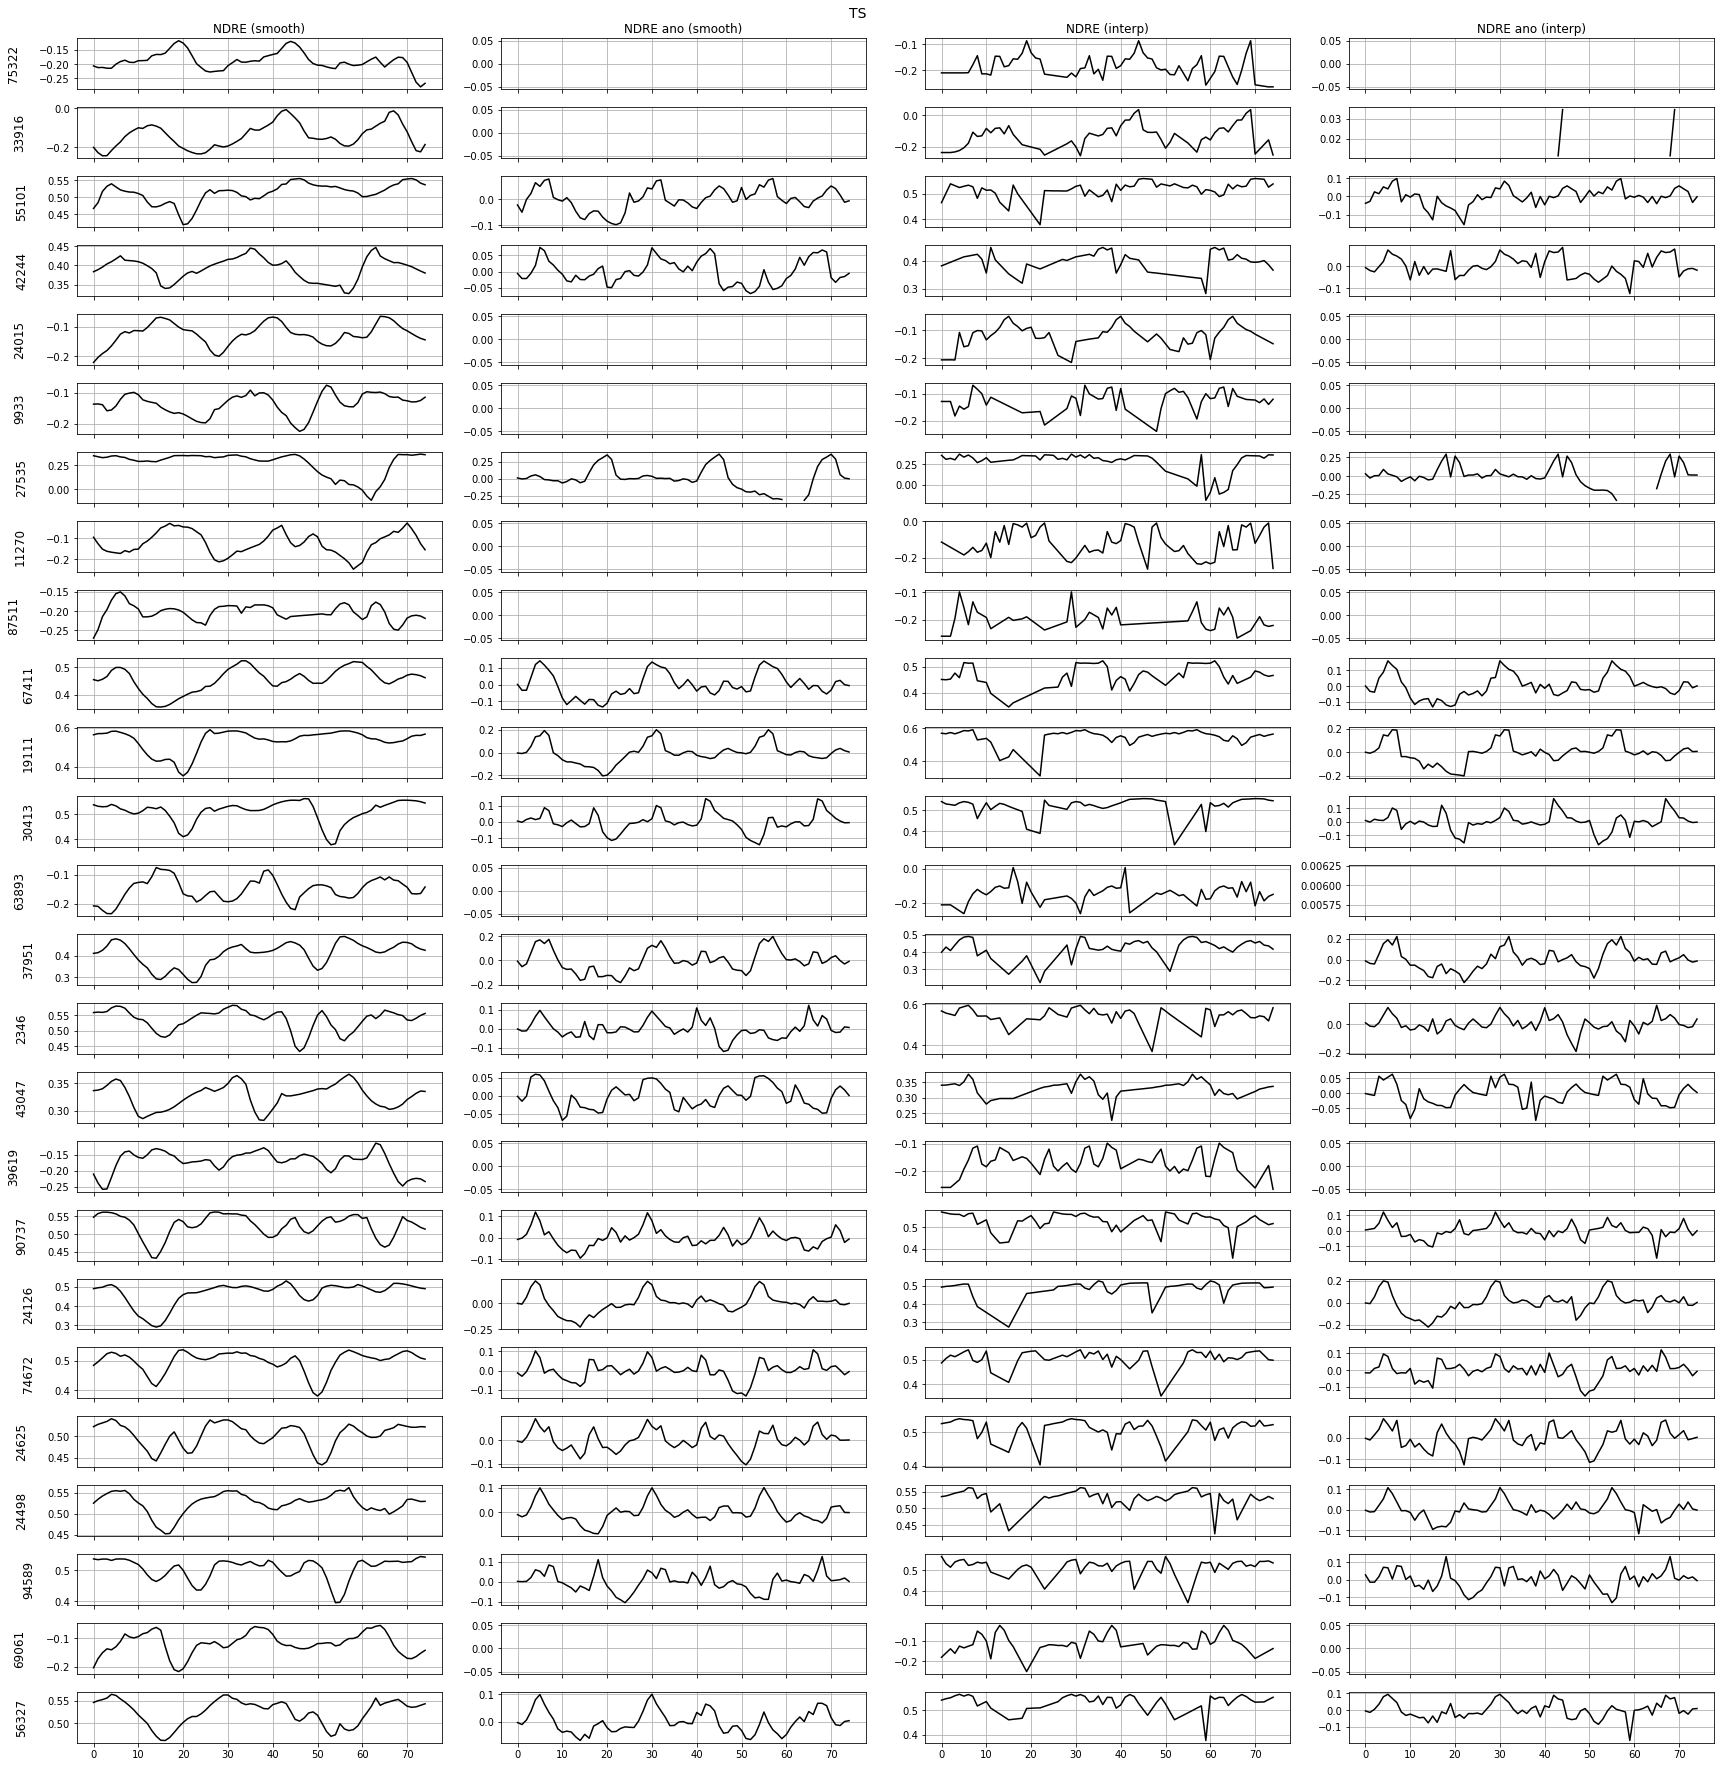

In [128]:
# Ploting the NDRE values and anomalies
iav_smooth = []
iav_interp = []
fig, axes = plt.subplots(nrows=len(list_random_pixels), ncols=4, sharex=True, figsize=(24,len(list_random_pixels)))
for i in range(len(list_random_pixels)):
    axes[i, 0].plot(arr_pixels ['ori']['smooth']['ndre'][i,:],  color='k')
    axes[i, 1].plot(arr_pixels ['ano']['smooth']['ndre'][i,:],  color='k')
    axes[i, 2].plot(arr_pixels ['ori']['interp']['ndre'][i,:],  color='k')
    axes[i, 3].plot(arr_pixels ['ano']['interp']['ndre'][i,:],  color='k')
    axes[i, 0].grid()
    axes[i, 1].grid()
    axes[i, 2].grid()
    axes[i, 3].grid()
    iav_smooth.append(arr_pixels ['ano']['smooth']['ndre'][i,:].std())
    iav_interp.append(arr_pixels ['ano']['interp']['ndre'][i,:].std())
    
cols = ['NDRE (smooth)', 'NDRE ano (smooth)', 'NDRE (interp)', 'NDRE ano (interp)']
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], list_random_pixels):
    ax.set_ylabel(str(row) + '\n', rotation=90, size='large')
    
fig.suptitle(f'TS \n', fontsize=14)
fig.tight_layout()
fig.savefig('ts_NDRE.png')

/ccs/proj/cli137/ud4/da_ndre/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Warning: converting a masked element to nan.
  
/ccs/proj/cli137/ud4/da_ndre/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Warning: converting a masked element to nan.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'iav_interp')

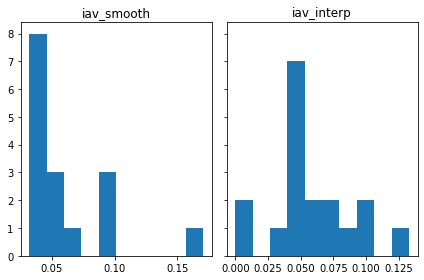

In [129]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(np.array(iav_smooth), bins=10)
axs[1].hist(np.array(iav_interp), bins=10)
axs[0].set_title("iav_smooth")
axs[1].set_title("iav_interp")

In [130]:
list_random_pixels

[75322,
 33916,
 55101,
 42244,
 24015,
 9933,
 27535,
 11270,
 87511,
 67411,
 19111,
 30413,
 63893,
 37951,
 2346,
 43047,
 39619,
 90737,
 24126,
 74672,
 24625,
 24498,
 94589,
 69061,
 56327]

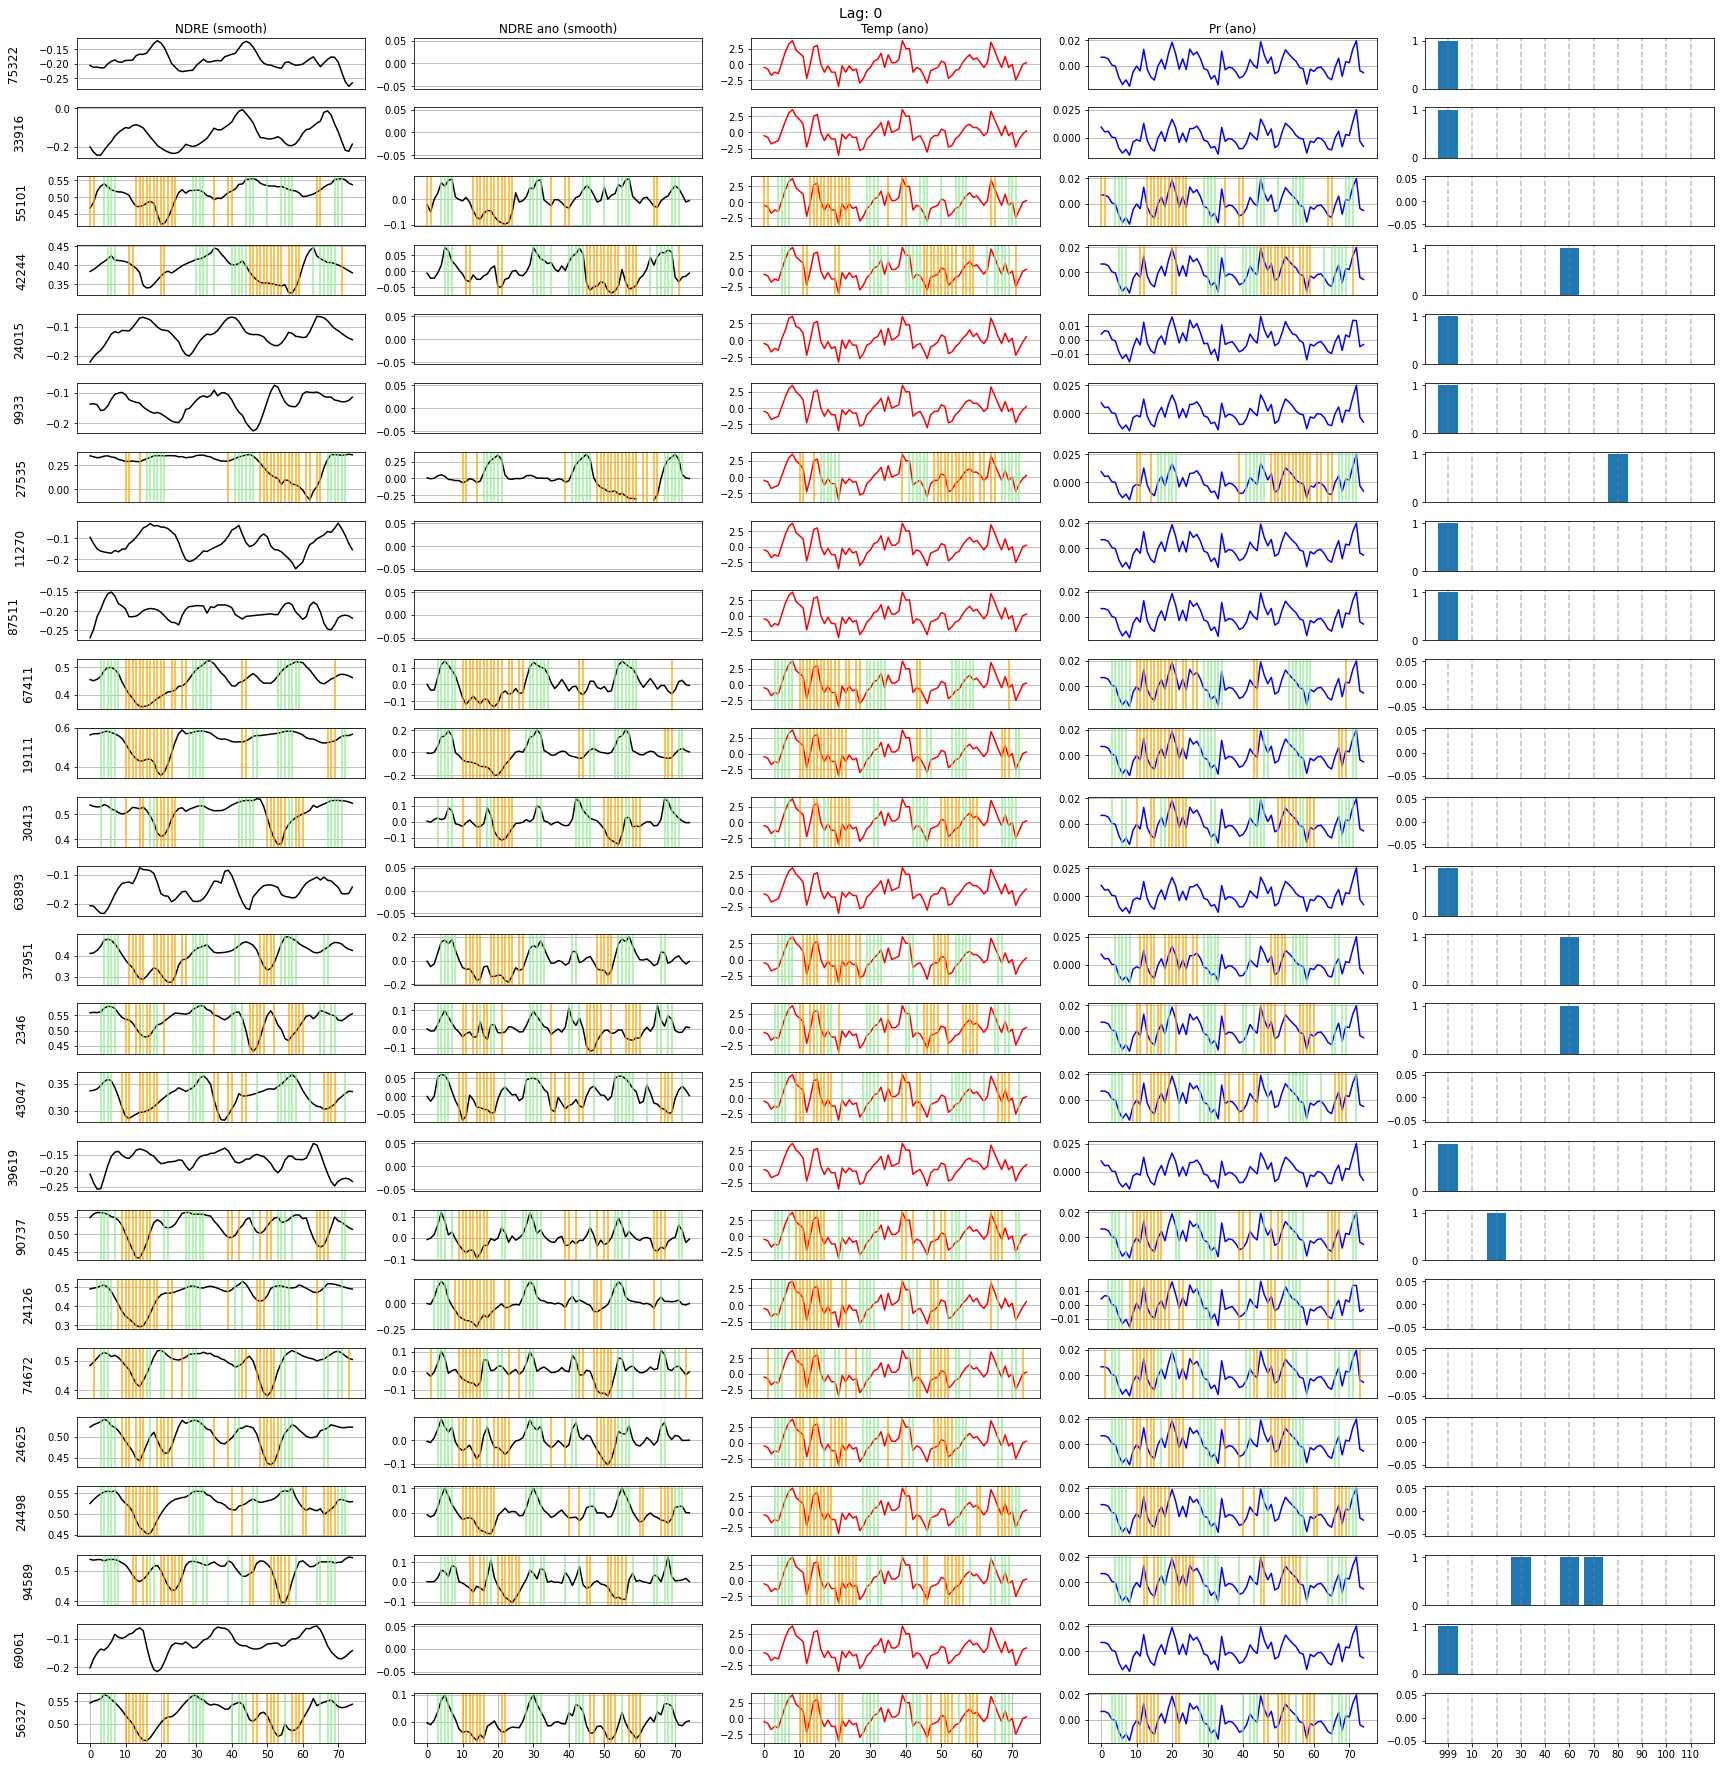

In [135]:
lag = 0
fig, axes = plt.subplots(nrows=len(list_random_pixels), ncols=5, sharex=False, figsize=(24,len(list_random_pixels)))
for i in range(len(list_random_pixels)):
    axes[i, 0].plot(arr_pixels ['ori']['smooth']['ndre'][i,:],  color='k')
    axes[i, 1].plot(arr_pixels ['ano']['smooth']['ndre'][i,:],  color='k')
    axes[i, 2].plot(arr_pixels ['ano']['smooth']['temp'][i,:],  color='r')
    axes[i, 3].plot(arr_pixels ['ano']['smooth']['prec'][i,:],  color='b')
    axes[i, 0].grid()
    axes[i, 1].grid()
    axes[i, 2].grid()
    axes[i, 3].grid()
    
    neg_loc_px = dict_loc_neg_smooth_ano[lag][i,:]
    for j in range(len(neg_loc_px)):
        if neg_loc_px[j]>0:
            for col_i in range(axes.shape[1]-1):
                axes[i,col_i].axvline(x=j, color='orange', alpha=0.9)
                
    pos_loc_px = dict_loc_pos_smooth_ano[lag][i,:]
    for j in range(len(pos_loc_px)):
        if pos_loc_px[j]>0:
            for col_i in range(axes.shape[1]-1):
                axes[i,col_i].axvline(x=j, color='lightgreen', alpha=0.9)
    
    axes[i, 4].bar(np.asarray(list(Codes.keys()),dtype = str),
        dict_attr_smooth_ano [lag][i,:] == np.array(list(Codes.keys())))
    for jc in range(len(list(Codes.keys()))):
        axes[i,4].axvline(x=jc, color='grey', alpha=0.5, ls = '--')
        
    # Turning the x-axis values off   
    if i < len(list_random_pixels)-1:
        for col_i in range(axes.shape[1]):
            axes[i, col_i].get_xaxis().set_visible(False)
cols = ['NDRE (smooth)', 'NDRE ano (smooth)', 'Temp (ano)', 'Pr (ano)']
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], list_random_pixels):
    ax.set_ylabel(str(row) + '\n', rotation=90, size='large')
    
fig.suptitle(f'Lag: {lag}\n', fontsize=14)
fig.tight_layout()
fig.savefig('smooth_ano_quar.png')
plt.show()

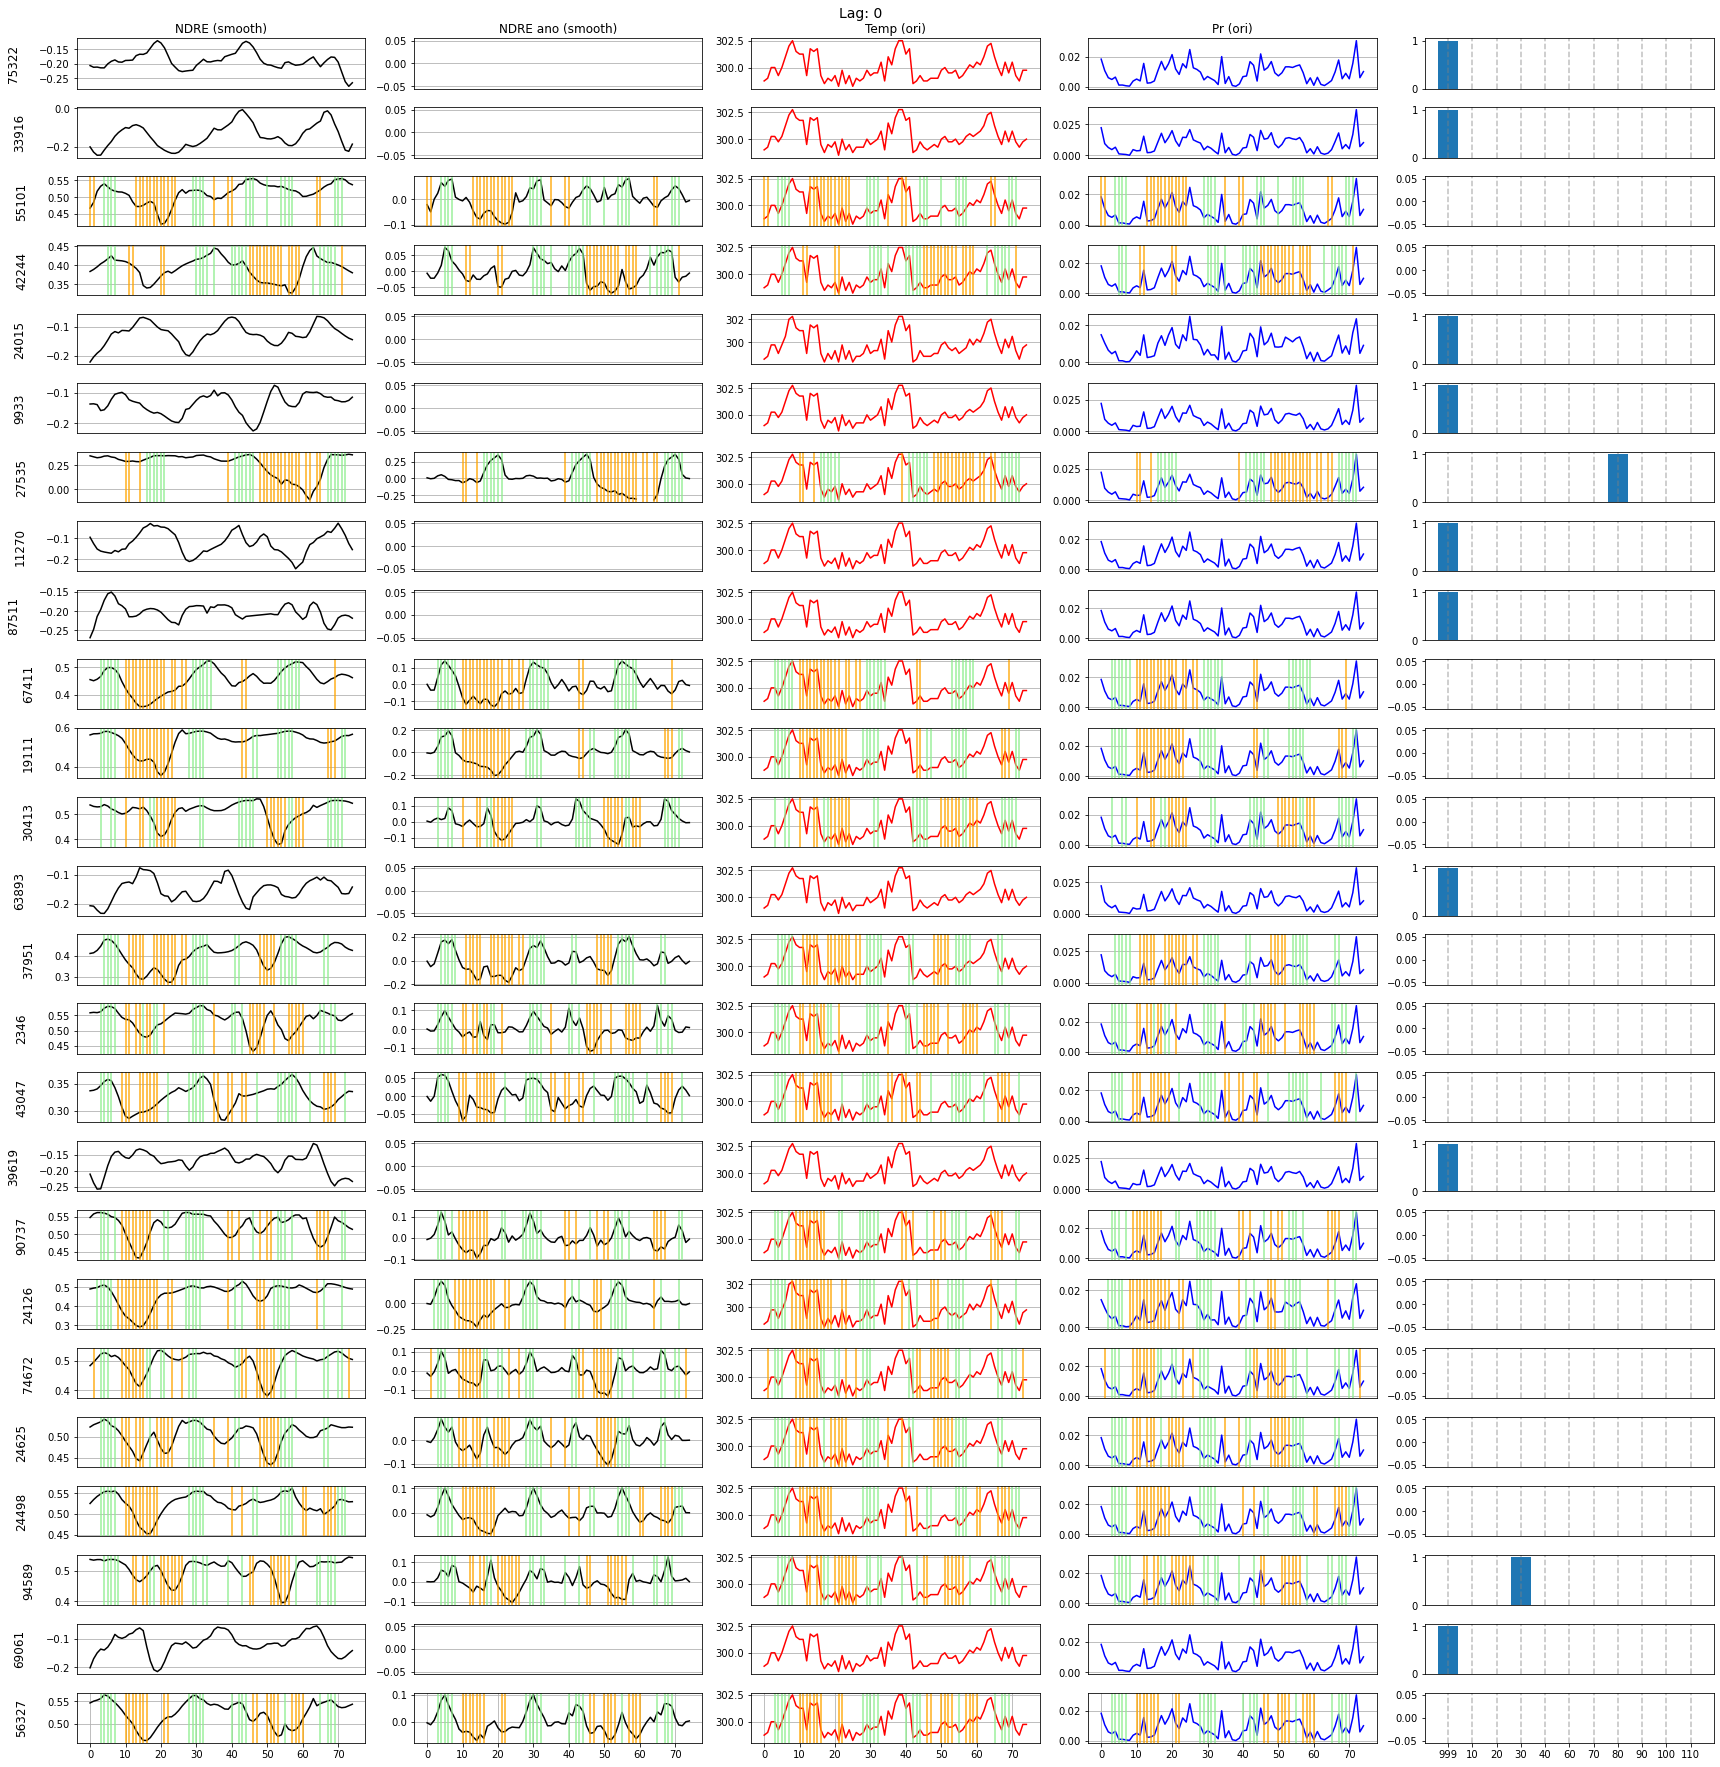

In [136]:
lag = 0
fig, axes = plt.subplots(nrows=len(list_random_pixels), ncols=5, sharex=False, figsize=(24,len(list_random_pixels)))
for i in range(len(list_random_pixels)):
    axes[i, 0].plot(arr_pixels ['ori']['smooth']['ndre'][i,:],  color='k')
    axes[i, 1].plot(arr_pixels ['ano']['smooth']['ndre'][i,:],  color='k')
    axes[i, 2].plot(arr_pixels ['ori']['smooth']['temp'][i,:],  color='r')
    axes[i, 3].plot(arr_pixels ['ori']['smooth']['prec'][i,:],  color='b')
    axes[i, 0].grid()
    axes[i, 1].grid()
    axes[i, 2].grid()
    axes[i, 3].grid()
    
    neg_loc_px = dict_loc_neg_smooth_ori[lag][i,:]
    for j in range(len(neg_loc_px)):
        if neg_loc_px[j]>0:
            for col_i in range(axes.shape[1]-1):
                axes[i,col_i].axvline(x=j, color='orange', alpha=0.9)
                
    pos_loc_px = dict_loc_pos_smooth_ori[lag][i,:]
    for j in range(len(pos_loc_px)):
        if pos_loc_px[j]>0:
            for col_i in range(axes.shape[1]-1):
                axes[i,col_i].axvline(x=j, color='lightgreen', alpha=0.9)
    
    axes[i, 4].bar(np.asarray(list(Codes.keys()),dtype = str),
        dict_attr_smooth_ori [lag][i,:] == np.array(list(Codes.keys())))
    for jc in range(len(list(Codes.keys()))):
        axes[i,4].axvline(x=jc, color='grey', alpha=0.5, ls = '--')
        
    # Turning the x-axis values off   
    if i < len(list_random_pixels)-1:
        for col_i in range(axes.shape[1]):
            axes[i, col_i].get_xaxis().set_visible(False)
cols = ['NDRE (smooth)', 'NDRE ano (smooth)', 'Temp (ori)', 'Pr (ori)']
for ax, col in zip(axes[0], cols):
    ax.set_title(col)
for ax, row in zip(axes[:,0], list_random_pixels):
    ax.set_ylabel(str(row) + '\n', rotation=90, size='large')
    
fig.suptitle(f'Lag: {lag}\n', fontsize=14)
fig.tight_layout()
fig.savefig('smooth_ori_quar.png')
plt.show()

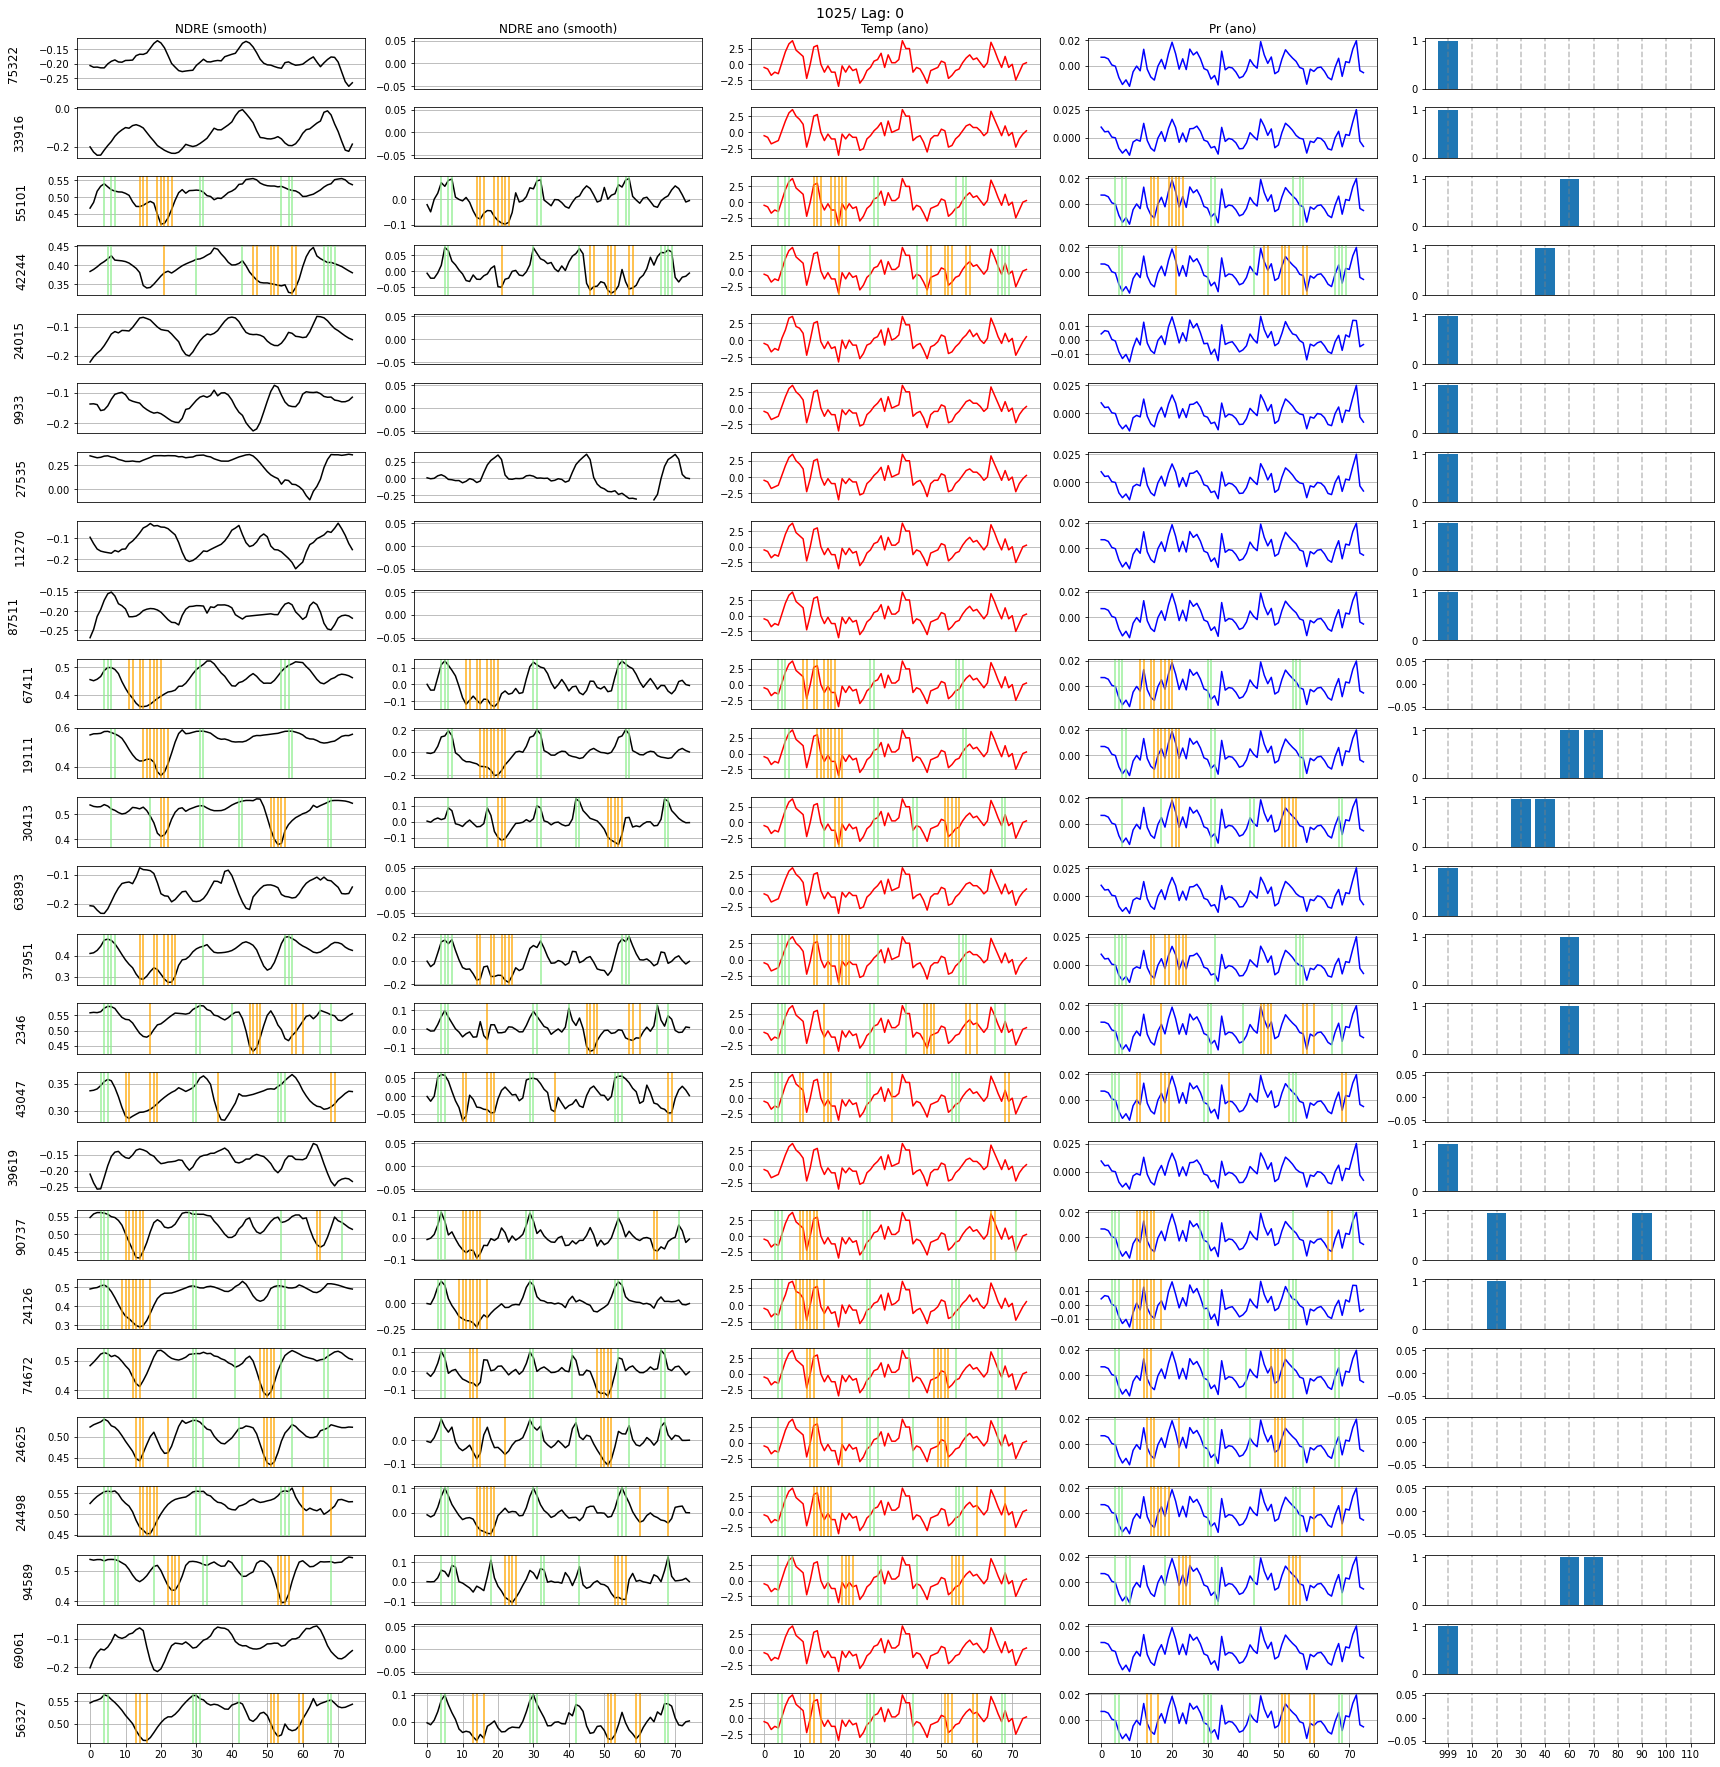

In [137]:
lag = 0
fig, axes = plt.subplots(nrows=len(list_random_pixels), ncols=5, sharex=False, figsize=(24,len(list_random_pixels)))
for i in range(len(list_random_pixels)):
    axes[i, 0].plot(arr_pixels ['ori']['smooth']['ndre'][i,:],  color='k')
    axes[i, 1].plot(arr_pixels ['ano']['smooth']['ndre'][i,:],  color='k')
    axes[i, 2].plot(arr_pixels ['ano']['smooth']['temp'][i,:],  color='r')
    axes[i, 3].plot(arr_pixels ['ano']['smooth']['prec'][i,:],  color='b')
    axes[i, 0].grid()
    axes[i, 1].grid()
    axes[i, 2].grid()
    axes[i, 3].grid()
    
    neg_loc_px = dict_loc_neg_smooth_ano_1025[lag][i,:]
    for j in range(len(neg_loc_px)):
        if neg_loc_px[j]>0:
            for col_i in range(axes.shape[1]-1):
                axes[i,col_i].axvline(x=j, color='orange', alpha=0.9)
                
    pos_loc_px = dict_loc_pos_smooth_ano_1025[lag][i,:]
    for j in range(len(pos_loc_px)):
        if pos_loc_px[j]>0:
            for col_i in range(axes.shape[1]-1):
                axes[i,col_i].axvline(x=j, color='lightgreen', alpha=0.9)
    
    axes[i, 4].bar(np.asarray(list(Codes.keys()),dtype = str),
        dict_attr_smooth_ano_1025 [lag][i,:] == np.array(list(Codes.keys())))
    for jc in range(len(list(Codes.keys()))):
        axes[i,4].axvline(x=jc, color='grey', alpha=0.5, ls = '--')
        
    # Turning the x-axis values off   
    if i < len(list_random_pixels)-1:
        for col_i in range(axes.shape[1]):
            axes[i, col_i].get_xaxis().set_visible(False)
cols = ['NDRE (smooth)', 'NDRE ano (smooth)', 'Temp (ano)', 'Pr (ano)']
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], list_random_pixels):
    ax.set_ylabel(str(row) + '\n', rotation=90, size='large')
    
fig.suptitle(f'1025/ Lag: {lag}\n', fontsize=14)
fig.tight_layout()
fig.savefig('smooth_ano_1025.png')
plt.show()

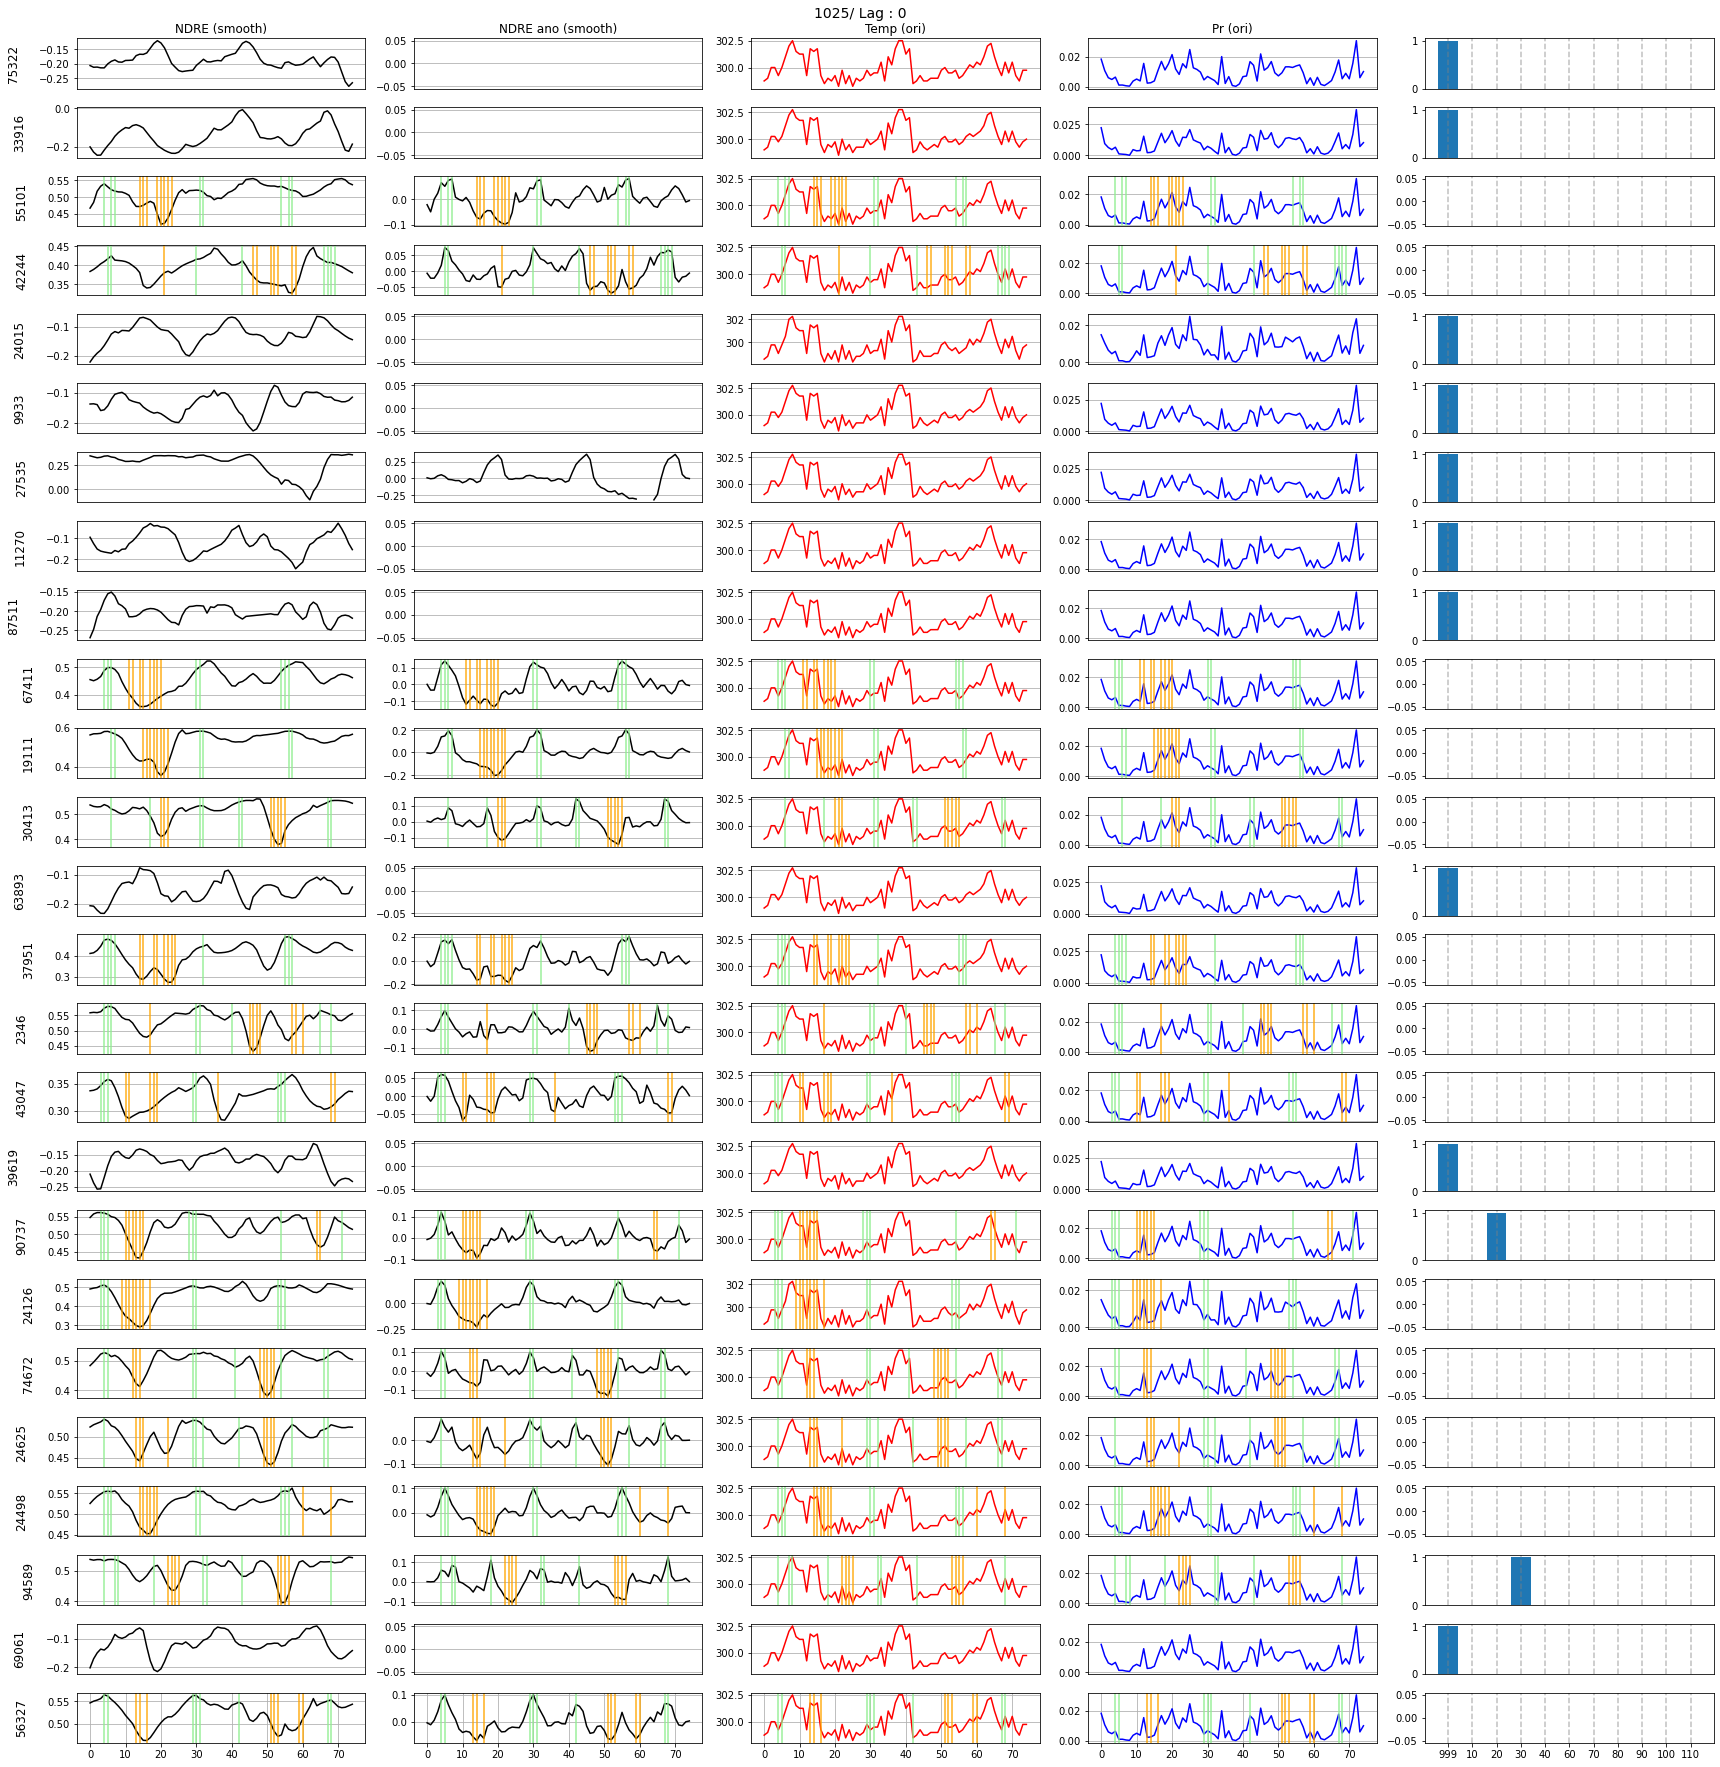

In [138]:
lag = 0
fig, axes = plt.subplots(nrows=len(list_random_pixels), ncols=5, sharex=False, figsize=(24,len(list_random_pixels)))
for i in range(len(list_random_pixels)):
    axes[i, 0].plot(arr_pixels ['ori']['smooth']['ndre'][i,:],  color='k')
    axes[i, 1].plot(arr_pixels ['ano']['smooth']['ndre'][i,:],  color='k')
    axes[i, 2].plot(arr_pixels ['ori']['smooth']['temp'][i,:],  color='r')
    axes[i, 3].plot(arr_pixels ['ori']['smooth']['prec'][i,:],  color='b')
    axes[i, 0].grid()
    axes[i, 1].grid()
    axes[i, 2].grid()
    axes[i, 3].grid()
    
    neg_loc_px = dict_loc_neg_smooth_ori_1025[lag][i,:]
    for j in range(len(neg_loc_px)):
        if neg_loc_px[j]>0:
            for col_i in range(axes.shape[1]-1):
                axes[i,col_i].axvline(x=j, color='orange', alpha=0.9)
                
    pos_loc_px = dict_loc_pos_smooth_ori_1025[lag][i,:]
    for j in range(len(pos_loc_px)):
        if pos_loc_px[j]>0:
            for col_i in range(axes.shape[1]-1):
                axes[i,col_i].axvline(x=j, color='lightgreen', alpha=0.9)
    
    axes[i, 4].bar(np.asarray(list(Codes.keys()),dtype = str),
        dict_attr_smooth_ori_1025 [lag][i,:] == np.array(list(Codes.keys())))
    for jc in range(len(list(Codes.keys()))):
        axes[i,4].axvline(x=jc, color='grey', alpha=0.5, ls = '--')
        
    # Turning the x-axis values off   
    if i < len(list_random_pixels)-1:
        for col_i in range(axes.shape[1]):
            axes[i, col_i].get_xaxis().set_visible(False)
cols = ['NDRE (smooth)', 'NDRE ano (smooth)', 'Temp (ori)', 'Pr (ori)']
for ax, col in zip(axes[0], cols):
    ax.set_title(col)
for ax, row in zip(axes[:,0], list_random_pixels):
    ax.set_ylabel(str(row) + '\n', rotation=90, size='large')
    
fig.suptitle(f'1025/ Lag : {lag}\n', fontsize=14)
fig.tight_layout()
fig.savefig('smooth_ori_1025.png')
plt.show()

In [145]:
# Checking if the computed attrs are same as this notebooks
# Read attribution codes
def read_attr_codes(num):
    dfs = []
    base = '/gpfs/alpine/cli137/proj-shared/6ru'
    p = base + '/' + 'amazonas_biweekly_0_timeseries_split_00_smooth'
    filenames = glob.glob( p + "/attr_ano_lag_{:02d}_rank_*.csv".format(num))
    filenames.sort()
    
    for filepath in filenames:
        this_df = pd.read_csv(filepath, sep=',', header=None, dtype=np.int32, skipinitialspace=True)
        dfs.append(this_df)
    dfs = pd.concat(dfs)
    return dfs

# Attribution codes
lag0 = (read_attr_codes(0)).reset_index(drop=True).iloc[list_random_pixels,:]


In [151]:
lag0

0   1   2   3   4   5   6   7   8   9   10
75322  999   0   0   0   0   0   0   0   0   0   0
33916  999   0   0   0   0   0   0   0   0   0   0
55101    0   0   0   0   0   0   0   0   0   0   0
42244    0   0   0   0   0  60   0   0   0   0   0
24015  999   0   0   0   0   0   0   0   0   0   0
9933   999   0   0   0   0   0   0   0   0   0   0
27535    0   0   0   0   0   0   0  80   0   0   0
11270  999   0   0   0   0   0   0   0   0   0   0
87511  999   0   0   0   0   0   0   0   0   0   0
67411    0   0   0   0   0   0   0   0   0   0   0
19111    0   0   0   0   0   0   0   0   0   0   0
30413    0   0   0   0   0   0   0   0   0   0   0
63893  999   0   0   0   0   0   0   0   0   0   0
37951    0   0   0   0   0  60   0   0   0   0   0
2346     0   0   0   0   0  60   0   0   0   0   0
43047    0   0   0   0   0   0   0   0   0   0   0
39619  999   0   0   0   0   0   0   0   0   0   0
90737    0   0  20   0   0   0   0   0   0   0   0
24126    0   0   0   0   0   0   0   0   0   0   0
74672    0   0   0   0   0   0   0   0   0   0   0
24625    0   0   0   0   0   0   0   0   0   0   0
24498    0   0   0   0   0   0   0   0   0   0   0
94589    0   0   0  30   0  60  70   0   0   0   0
69061  999   0   0   0   0   0   0   0   0   0   0
56327    0   0   0   0   0   0   0   0   0   0   0

In [147]:
dict_attr_smooth_ano [lag]

array([[999.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [999.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  60.,   0.,   0.,   0.,   0.,   0.],
       [999.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [999.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  80.,   0.,   0.,   0.],
       [999.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [999.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [999.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,

In [150]:
lag0.to_numpy() == dict_attr_smooth_ano [lag]

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  Tr